In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [25]:
train = np.genfromtxt("five year train pf12.csv", delimiter=",")
test = np.genfromtxt("no average 1.5year test.csv", delimiter=",")
testdraw = np.genfromtxt("test data day 292,315,336.csv", delimiter=",")

In [26]:
x_train, y_train = train[1:,0:17], train[1:,42]
x_test, y_test = test[1:,0:17], test[1:,42]
x_datefirst, y_datefirst = testdraw[1:52,0:17], testdraw[1:52,42]
y_datesecond = testdraw[52:103,42]
y_datethird = testdraw[103:,42]
fig4ydepth = testdraw[103:,16]


RMSE= 0.047859114187977295
score: 0.888637


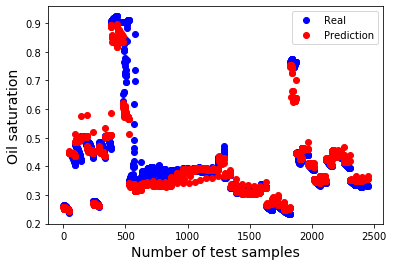

No handles with labels found to put in legend.


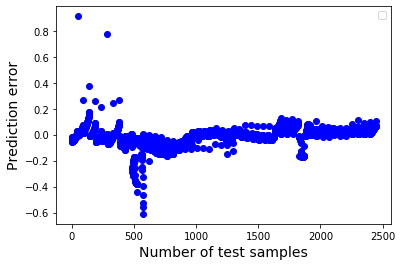

No handles with labels found to put in legend.


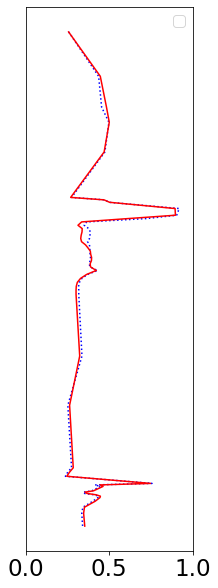

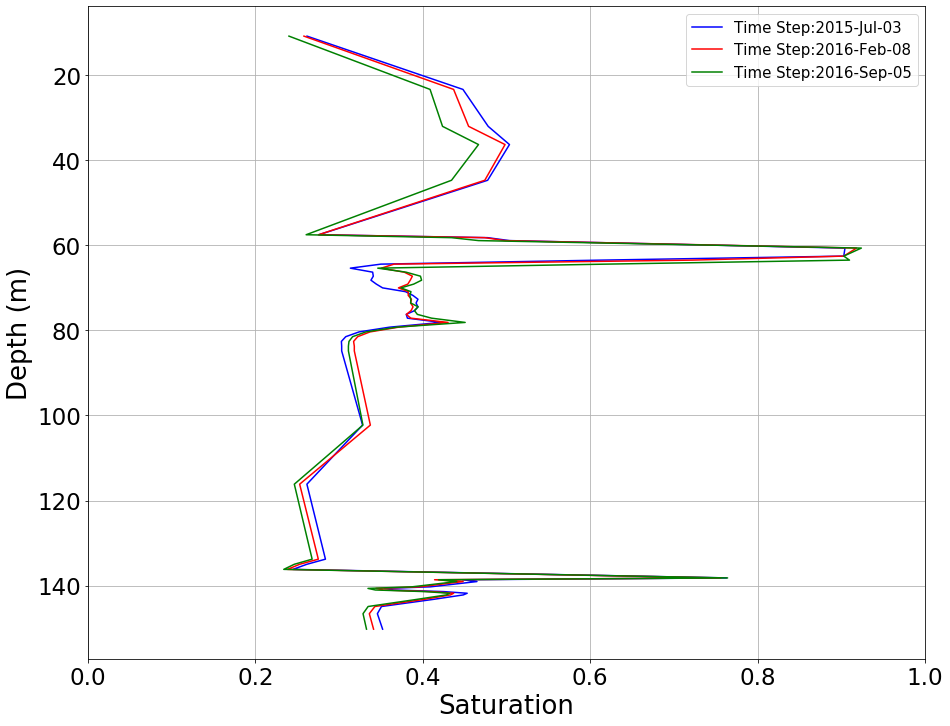

In [29]:
def try_different_method(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    #print RMSE
    from sklearn.metrics import mean_squared_error
    print('RMSE=', np.sqrt(mean_squared_error(y_test, result)))
    print('score: %f'%score)
    
    #print(result)
    #output predict y
    dataframe = pd.DataFrame({'y_pre':result })  
    #DataFrame store as csv,index，default=True
    dataframe.to_csv("output.csv",index=False,sep=',')   

    #draw  figure 1
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'bo',label='Real')
    plt.plot(np.arange(len(result)),result,'ro',label='Prediction')
    #plt.title('score: %f'%score)
    font={'size':14}
    plt.xlabel('Number of test samples',font)
    plt.ylabel('Oil saturation',font)
    plt.legend()
    plt.show()
    
    #draw pred_error figure 2
    pred_error = (result-y_test)/y_test
    plt.figure()
    plt.plot(np.arange(len(pred_error)), pred_error,'bo')
    #plt.title('pred_error')
    font={'size':14}
    plt.xlabel('Number of test samples',font)
    plt.ylabel('Prediction error', font)
    plt.legend()
    plt.show()

#    draw figure 3 compare predict and actual value in depth 1
#     origin_data2 = StandardScaler().inverse_transform(result2)
    
#     plt.figure(figsize=(10,6))
#     plt.plot(np.arange(len(result)), y_test,'b-',label='test value')
#     plt.plot(np.arange(len(result)), result,'r-',label='test predict')
#     plt.xlabel('days')
#     plt.ylabel('saturation')
#     plt.legend()
#     plt.show()
    

    #draw figure 4 of depth and saturation in one day.
    result_4 = model.predict(x_datefirst)
    #origin_data3 =  StandardScaler().inverse_transform(result3)
    plt.figure(figsize=(3,10))
    plt.plot(y_datesecond, fig4ydepth, 'b:')
    plt.plot(result_4, fig4ydepth, 'r-')
    font={'size':26}#size of ax lable
    #plt.xlabel('Saturation',font)
    plt.ylabel('Depth (m)',font)
    
    #hide the lable
    frame = plt.gca()
    frame.axes.get_yaxis().set_visible(False)
    
    #invert x,y
    ax = plt.gca() 
    #ax.xaxis.set_ticks_position('top')  #put x_ax from down to up
    
    ax.invert_yaxis()  #y ax invert
    plt.legend(loc='upper right', fontsize=15)
    plt.xlim(0, 1) #set ax scale
    plt.tick_params(labelsize=23)#set label font size 
    plt.show()
    
    #draw figure 5 of real data in depth and saturation in 3 dates.
    plt.figure(figsize=(15,12))
    plt.plot(y_datefirst, fig4ydepth, 'b-',label='Time Step:2015-Jul-03')
    plt.plot(y_datesecond, fig4ydepth, 'r-',label='Time Step:2016-Feb-08')
    plt.plot(y_datethird, fig4ydepth, 'g-',label='Time Step:2016-Sep-05')
    
    
    plt.xlim(0, 1)
   # my_x_ticks = np.arange(0, 1, 0.1)
    font={'size':26}
    plt.xlabel('Saturation',font)
    plt.ylabel('Depth (m)',font)
    #invert x,y
    ax = plt.gca() 
    #ax.xaxis.set_ticks_position('top')  
    
    ax.invert_yaxis()  #y轴反向
    plt.legend(loc='upper right', fontsize=15)
    plt.tick_params(labelsize=23)
    
    plt.grid()
    plt.show()
    
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)
try_different_method(model_RandomForestRegressor)